# Analyzing NBA Players at Each Position & Player Efficiency Rating
### Ashu Garg
## Introduction
Have you ever wondered what the differences are between the 5 positions in basketball? Do you want to find out whether one can predict players' positions based off of their stats? Have you ever wondered how player efficiency ratings are calculated? Are you here to learn how to use data science to explore and analyze a dataset? If you answered yes to any of these questions, then this tutorial is perfect for you! If not, read on anyways, and you may just surprise yourself with how interested you become! 

This tutorial is meant to serve as a guide for using data science to explore an interesting dataset related to the NBA (National Basketball Association). The key tools used in this guide include Python 3 and Jupyter Notebook. For a great guide on how to set these up and start your own data science project, please see https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook. 

This tutorial will be organized by the following data science pipeline: <br>
Data Collection <br>
Data Processing <br>
Exploratory Data Analysis and Visualization <br>
Hypothesis Testing and Machine Learning <br>
Final Insights 

Each step will include an overview of my approach, the code used to produce meaningful results, and an analysis of the output. If you follow along with this tutorial in the order that it is presented, you will learn something new and be able to get started on your own data science project in no time!

## Data Collection
The first step is to download the data from https://www.kaggle.com/drgilermo/nba-players-stats/data. The dataset I will be using for this tutorial consists of NBA players stats since 1950. The data is downloaded as a CSV file, which can easily be read by Python. In this stage, I am simply reading in the data that I am interested in into a Pandas DataFrame. Note that I will only read in the columns I am interested in for my analysis, because some columns contain data that will not be relevant.

For more information about pandas and DataFrames, see https://pandas.pydata.org/pandas-docs/stable/10min.html and https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm respectively.


In [135]:
# Import all necessary libraries for the tutorial
import pandas as pd
import math
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
import sklearn.svm as svm
from sklearn import datasets, linear_model, neighbors, neural_network
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC, SVR
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import scipy.stats as stats

In [136]:
# Load the relevant columns from the data file into a pandas dataframe
data = pd.read_csv("NBA Season Stats.csv", usecols=['Year', 'Player', 'Pos', 'MP', 'PER', 'FG', 'FG%', '3P', '3P%', 'FT', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF'])
# Display first 5 rows of data
data.head()

,Year,Player,Pos,MP,PER,FG,FG%,3P,3P%,FT,FT%,TRB,AST,STL,BLK,TOV,PF
0,1950.0,Curly Armstrong,G-F,NaN,NaN,144.0,0.279,NaN,NaN,170.0,0.705,NaN,176.0,NaN,NaN,NaN,217.0
1,1950.0,Cliff Barker,SG,NaN,NaN,102.0,0.372,NaN,NaN,75.0,0.708,NaN,109.0,NaN,NaN,NaN,99.0
2,1950.0,Leo Barnhorst,SF,NaN,NaN,174.0,0.349,NaN,NaN,90.0,0.698,NaN,140.0,NaN,NaN,NaN,192.0
3,1950.0,Ed Bartels,F,NaN,NaN,22.0,0.256,NaN,NaN,19.0,0.559,NaN,20.0,NaN,NaN,NaN,29.0
4,1950.0,Ed Bartels,F,NaN,NaN,21.0,0.256,NaN,NaN,17.0,0.548,NaN,20.0,NaN,NaN,NaN,27.0


## Data Processing
Now that I have the data in a DataFrame, it is time to tidy the data. First I will rename the columns for greater readability and understanding for novices. I will then only keep the data from the year 2000 onwards, so that I have a more recent timeframe to work with. I will also get rid of players that have played under 2000 minutes in a given year, because these players are likely going to be outliers and skew the data. Starters in the NBA will typically have over 2000 minutes played, and this is my target group for my analysis. I will also get rid of records with missing values, to make later visualization and analysis steps easier to perform. Lastly, I will get rid of records in which the player plays multiple positions. I am interested in comparing players at different positions, so players who play two positions would not fit well into my dataset. This is a large dataset, so I will have enough data even after removing such players. 

For information on how to drop missing values, see https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html.

In [137]:
# Rename columns for readability and comprehension
data.columns = ['Year', 'Player', 'Position', 'Minutes', 'Player Efficiency Rating', 'Field Goals', 'Field Goal %', '3 Pointers', '3 Point %', 'Free Throws', 'Free Throw %', 'Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Fouls']
# Only keep data from 2000 onwards
data = data[data['Year'] >= 2000]
# Only keep data in which players have played over 2000 minutes in the season
data = data[data['Minutes'] >= 2000]
# Remove any rows with missing values
data.dropna(inplace = True)
# Remove any rows where player plays multiple positions
data = data[data['Position'].str.len() <= 2]
# Reset dataframe indices after dropping rows
data = data.reset_index(drop=True)
# Display first 5 rows of data
data.head()

,Year,Player,Position,Minutes,Player Efficiency Rating,Field Goals,Field Goal %,3 Pointers,3 Point %,Free Throws,Free Throw %,Rebounds,Assists,Steals,Blocks,Turnovers,Fouls
0,2000.0,Shareef Abdur-Rahim,SF,3223.0,20.2,594.0,0.465,29.0,0.302,446.0,0.809,825.0,271.0,89.0,87.0,249.0,244.0
1,2000.0,Ray Allen,SG,3070.0,20.6,642.0,0.455,172.0,0.423,353.0,0.887,359.0,308.0,110.0,19.0,183.0,187.0
2,2000.0,Derek Anderson,SG,2201.0,16.9,377.0,0.438,55.0,0.309,271.0,0.877,258.0,220.0,90.0,11.0,167.0,149.0
3,2000.0,Kenny Anderson,PG,2593.0,17.4,434.0,0.440,85.0,0.386,196.0,0.775,225.0,420.0,139.0,8.0,130.0,230.0
4,2000.0,Nick Anderson,SG,2094.0,11.8,306.0,0.391,132.0,0.332,37.0,0.487,339.0,123.0,94.0,16.0,95.0,118.0


The output is fairly self explanatory, but what we end up with is essentially Python's version of a table stored in a variable called data. We can now index these values however we wish and perform all sorts of visualization and analysis on this dataset using Python libraries. 

Note: The different positions in basketball are Point Guard (PG), Shooting Guard (SG), Small Forward (SF), Power Forward (PF), Center (C). 

## Exploratory Data Analysis & Visualization
At this stage, I have my data ready to visualize and analyze. Before I can draw any firm conclusions from the data, it is important to make some plots that can help me discover trends in the data that may be relevant. I will first plot the average stats for players at each of the 5 positions to spot any correlations. I will also plot shooting statistics for players at each position for the same purposes. Lastly, I will explore the correlation between various statistics and player efficiency rating. 

For more information on grouping data in pandas, see the groupby method: https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm.
To explore plotting and visualization, consider Matplotlib: http://matplotlib.org/tutorials/index.html

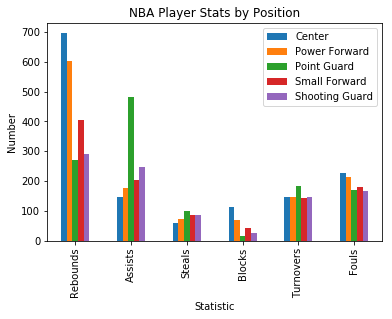

In [138]:
# Group the data by position and calculate average stats for each position
average_stats = data.groupby('Position')['Rebounds', 'Assists', 'Steals', 'Blocks', 'Turnovers', 'Fouls'].mean()
# Plot bar graph showing average stats by position
average_stats.T.plot(kind = 'bar' , title = 'NBA Player Stats by Position')
# Display legend to the right of the plot for readability
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Set legend labels for comprehension
plt.legend(['Center', 'Power Forward', 'Point Guard', 'Small Forward', 'Shooting Guard'])
# Add label for x-axis
plt.xlabel('Statistic')
# Add label for y-axis
plt.ylabel('Number')
# Display the plot
plt.show()
# Clear the plot
plt.clf()

This plot reveals some interesting insight. Certain stats like steals and turnovers seem to be relatively balanced between positions, but stats like blocks, rebounds and assists clearly have substantial differences based on position. This plot affirms that I might eventually be able to predict a player's position based entirely on his stats with some degree of accuracy.

For those that are interested in the basketball-specific insight behind this visualization, please read the following paragraph. Most of these statistics will come as no surprise to an average basketball enthusiast. The average big man (center or PF) will have more rebounds than a guard (PG, SG) in most cases, because he will be under or near the basket more often. The same logic applies for blocks and fouls. In the case of assists, the point guard is the primary ball handler, so he will likely pass more often and make plays that lead to his teammates scoring. Turnovers are also more likely for point guards, since they have the ball for more time than any other type of player. 

Next, I can make another plot using other statistics revolving around shooting percentages. This will help me see how shooting in particular is related to position. 

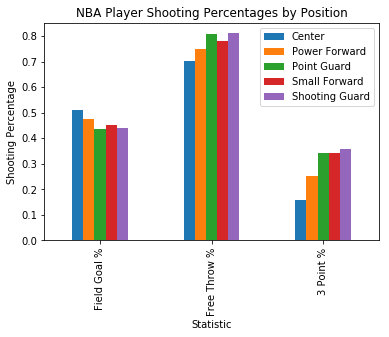

In [139]:
# Group the data by position and calculate average stats for each position
average_stats = data.groupby('Position')['Field Goal %', 'Free Throw %', '3 Point %'].mean()
# Plot bar graph showing average stats by position
average_stats.T.plot(kind = 'bar' , title = 'NBA Player Shooting Percentages by Position')
# Display legend to the right of the plot for readability
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# Set legend labels for comprehension
plt.legend(['Center', 'Power Forward', 'Point Guard', 'Small Forward', 'Shooting Guard'])
# Add label for x-axis
plt.xlabel('Statistic')
# Add label for y-axis
plt.ylabel('Shooting Percentage')
# Display the plot
plt.show()
# Clear the plot
plt.clf()

Based on this plot, it is evident that shooting differs based on the player's position. 3 point shooting percentages seem to vary greatly based on position, while variation in free throw percentage and field goal percentage is more subtle.

Once again, for those interested in basketball-specific analysis, please read on. It is no surprise that guards will typically shoot the ball better than big men from the 3 point line. Most big men don't take many 3 pointers, and instead take shots closer to the basket. On the other hand, it makes sense for big men to have higher average field goal percentages overall, because typically shot percentages are higher near the basket compared to long-range shots. Because the guards take more 3 pointers and mid-range shots, their overall field goal percentage will be lower compared to big men. 

Next, I will explore the relationship between various statistics and player efficiency rating. This is no longer strictly related to a player's position, so I cannot use the same type of visualization as I used above. I will come up with a preliminary hypothesis about what factors I think will correlate with player efficiency rating and then fit a linear regression model to test my hypothesis. My initial hypothesis is that field goals, steals, 3 pointers, free throws, blocks, fouls, turnovers, rebounds, and assists will all be significant in predicting player efficiency rating. I will formally test this hypothesis in the next stage of the data science pipeline, but for now I will plot Pearson's correlation coefficient between each of the variables I chose and player efficiency rating to get an idea of the degree of correlation between them. Pearson's correlation coefficient is used to determine the correlation between two variables on a scale of -1 to 1, where 1 indicates a highly positive correlation and -1 indicates a highly negative correlation. 0 indicates no correlation between the two variables. 

For more information on Pearson's correlation coefficient, see http://onlinestatbook.com/2/describing_bivariate_data/pearson.html.

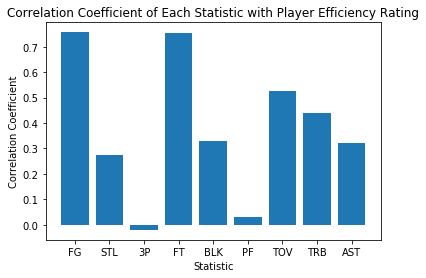

In [140]:
# Create empty list for correlation coefficient values
r = []
# For each statistic, append correlation coefficient between statistic and player efficiency rating to list
r.append(data['Field Goals'].corr(data['Player Efficiency Rating']))
r.append(data['Steals'].corr(data['Player Efficiency Rating']))
r.append(data['3 Pointers'].corr(data['Player Efficiency Rating']))
r.append(data['Free Throws'].corr(data['Player Efficiency Rating']))
r.append(data['Blocks'].corr(data['Player Efficiency Rating']))
r.append(data['Fouls'].corr(data['Player Efficiency Rating']))
r.append(data['Turnovers'].corr(data['Player Efficiency Rating']))
r.append(data['Rebounds'].corr(data['Player Efficiency Rating']))
r.append(data['Assists'].corr(data['Player Efficiency Rating']))
# Store statistic names in list
objects = ['FG', 'STL', '3P', 'FT', 'BLK', 'PF', 'TOV', 'TRB', 'AST']
# Create numpy array with values 1-# of statistics
y_pos = np.arange(len(objects)) 
# Plot a bar graph of each statistic with it's associated correlation coefficient
plt.bar(y_pos, r, align='center')
# X-axis labels are each statistic
plt.xticks(y_pos, objects)
# Add label for x-axis
plt.xlabel('Statistic')
# Add label for y-axis
plt.ylabel('Correlation Coefficient')
# Add title 
plt.title('Correlation Coefficient of Each Statistic with Player Efficiency Rating') 
# Display bar graph
plt.show()
# Clear plot
plt.clf()

Legend: FG (Field Goals), STL (Steals), 3P (3 Pointers), FT (Free Throws), BLK (Blocks), PF (Fouls), TOV (Turnovers), TRB (Rebounds), AST (Assists).

The output clearly indicates that several of these statistics are moderately or strongly correlated with player efficiency rating. Statistics like field goals and free throws seem to be highly correlated with player efficiency rating with r values greater than 0.7, while ones like 3 pointers and fouls do not have a visible correlation, with r values close to 0. However, it is difficult to judge which statistics would be useful to include in my final model, because Pearson's correlation coefficient only measures the correlation between two variables. My final regression model will include multiple variables as predictors, because player efficiency rating cannot be explained by any one statistic. Therefore, I will let my own domain knowledge guide my choice of initial variables to include. I will keep all of these statistics in consideration for now, and formally test my hypothesis in the next stage.

## Hypothesis Testing & Machine Learning
Now that I have explored the data and observed some of the correlations, I am ready for hypothesis testing and machine learning. This is the stage where I can start testing some of my hypotheses and even fit a model that can predict a player's position based on his stats. Because my output or label is categorical (position), I cannot use a simple linear regression model. Linear regression models can only be used for numerical labels, so I will use multi-class classifiers to see if I can accurately predict a player's positions based on the predictors (statistics) that are determined to be statistically significant in explaining the variation in players' positions. Please note that I will use supervised machine learning models throughout this stage, seeing as I have a lot of data with labels provided. In this case, the label is the position of the player, while the features will be various statistics of the player.

Before I can start building models for classification, I have to do a bit of feature engineering to find out which statistics are most significant in explaining a player's position. While my exploratory data analysis helped me spot some trends, there are many statistical methods to determine which features add the most value to a classification model. I will use a tree-based approach to discovering which statistics offer the most information gain. The key benefit to feature engineering is to avoid overfitting by including too many features that don't add much value to my model. Another obvious advantage is quicker training time for my classifiers, since they would have less features to consider. 

For an overview of supervised machine learning, see https://www.toptal.com/machine-learning/machine-learning-theory-an-introductory-primer. For more information about multi-class classification in Python, see http://scikit-learn.org/stable/modules/multiclass.html. To learn more about feature engineering, see https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn.

In [141]:
# Put features (statistics) and labels (position) into X and Y respectively to use for supervised learning
X = data[['Assists', 'Rebounds', 'Steals', 'Turnovers', 'Blocks', 'Field Goal %', 'Free Throw %', '3 Point %', 'Fouls']]
Y = data['Position']
# Create extra trees classifier model
model = ExtraTreesClassifier()
# Fit the model using our data
model.fit(X, Y)
# Display the relative importance of each feature
print(model.feature_importances_)

[ 0.21166088  0.21597437  0.08529935  0.07279925  0.11393487  0.08208415
  0.06940972  0.08271064  0.06612677]


The most important features seem to be assists, rebounds, and blocks, but some of the other features may still improve my classification accuracy. Therefore, I will include any features with a relative importance > .08. Now that I can see what my most important features are, I am ready to use some machine learning classifiers to model my data. I will use a random forest classifier, a logistic regression model, and a k nearest neighbors classifier to predict a player's position based on his stats. For each classifier, I will use 10-fold cross validation, which essentially splits the data into different sets of training and test data for 10 runs. The accuracies of each classifier for each run are computed and displayed.

For more information on these classifiers, see https://medium.com/machine-learning-101/chapter-5-random-forest-classifier-56dc7425c3e1 and https://machinelearningmastery.com/logistic-regression-for-machine-learning and https://medium.com/machine-learning-101/k-nearest-neighbors-classifier-1c1ff404d265. To learn more about cross-validation, see http://www.ritchieng.com/machine-learning-cross-validation. 

In [142]:
# Modify features to only include those with relative importance > .08
X = data[['Assists', 'Rebounds', 'Steals', 'Turnovers', 'Blocks', '3 Point %']]
# Create a random forest classifier with 10 trees (default) and all other default params 
rfc = RandomForestClassifier()
# Run 10-fold cross validation with the random forest classifier
scores1 = cross_val_score(rfc, X, Y, scoring = 'accuracy', cv=10)
# Print accuracies for each of the 10 runs
print("Random Forest:", scores1)
# Create a logistic regression classifier using a one-versus-rest approach for multi-class classification 
lrc = linear_model.LogisticRegression(multi_class='ovr')
# Run 10-fold cross validation with the logistic regression classifier
scores2 = cross_val_score(lrc, X, Y, scoring = 'accuracy', cv=10)
# Print accuracies for each of the 10 runs
print("Logistic Regression:", scores2)
# Create a k nearest neighbors classifier
knc = neighbors.KNeighborsClassifier()
# Run 10-fold cross validation with the k nearest neighbors classifier
scores3 = cross_val_score(knc, X, Y, scoring = 'accuracy', cv=10)
# Print accuracies for each of the 10 runs
print("K Nearest Neighbors:", scores3)

Random Forest: [ 0.66176471  0.62745098  0.62561576  0.69458128  0.67326733  0.65174129
  0.67661692  0.65671642  0.645       0.6281407 ]
Logistic Regression: [ 0.64705882  0.62745098  0.63546798  0.65517241  0.65346535  0.64179104
  0.68159204  0.65174129  0.675       0.66331658]
K Nearest Neighbors: [ 0.62745098  0.66176471  0.60591133  0.68965517  0.63366337  0.63681592
  0.67661692  0.66169154  0.675       0.66331658]


The output shows the accuracy of each of my classifiers on the dataset using 10-fold cross validation. The three classifiers perform similarly by visual inspection, as their accuracies are similar around 65%. The accuracies aren't too bad, considering the variability in player statistics. It is difficult to classify a player's position based solely on statistics, because even players playing at the same position have variability in their statistics. In addition, there are likely many outliers that would reduce the accuracy, such as great all-around players who defy the normal statistical trends for their position. In recent years, there has been an emergence of players who don't fit into the traditional positions, because they can satisfy multiple roles well. These players make it hard to perform predictive analytics of this nature. 

Next, I will test my initial hypothesis regarding the statistics that correlate with player efficiency rating. To recap, my initial hypothesis was that field goals, steals, 3 pointers, free throws, blocks, fouls, turnovers, rebounds, and assists will all be significant in predicting player efficiency rating. I can now test this hypothesis using linear regression. Like the last example, my features will be various statistics. The difference is that my label is now numerical (player efficiency rating). Therefore, I can now use linear regression as one possible approach for my model.

For more information on ordinary least squares or the statsmodel API, see https://www.datarobot.com/blog/ordinary-least-squares-in-python/.

In [143]:
# Put features in X and labels in Y
X = data[['Field Goals', 'Steals', '3 Pointers', 'Free Throws', 'Blocks', 'Fouls', 'Turnovers', 'Rebounds', 'Assists']]
Y = data['Player Efficiency Rating']
# Fit an ordinary least squares model using statsmodel API
est = sm.OLS(Y, X).fit()
# Print the summary of the fit
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Player Efficiency Rating   R-squared:                       0.983
Model:                                  OLS   Adj. R-squared:                  0.983
Method:                       Least Squares   F-statistic:                 1.301e+04
Date:                      Thu, 07 Dec 2017   Prob (F-statistic):               0.00
Time:                              17:23:47   Log-Likelihood:                -4513.2
No. Observations:                      2018   AIC:                             9044.
Df Residuals:                          2009   BIC:                             9095.
Df Model:                                 9                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Field Goals     0.0166      0.001     27.113      0.000       0.015       0.018
Steals          0.0136      0.002      7.255      0.000       0.010       0.017
3 Pointers      0.0079      0.001      7.989      0.000       0.006       0.010
Free Throws     0.0130      0.001     19.049      0.000       0.012       0.014
Blocks          0.0157      0.002      9.661      0.000       0.012       0.019
Fouls           0.0092      0.001      8.990      0.000       0.007       0.011
Turnovers      -0.0293      0.002    -15.989      0.000      -0.033      -0.026
Rebounds        0.0081      0.000     19.458      0.000       0.007       0.009
Assists         0.0133      0.001     25.268      0.000       0.012       0.014
==============================================================================
Omnibus:                        5.361   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.069   Jarque-Bera (JB):                5.427
Skew:                           0.122   Prob(JB):                       0.0663
Kurtosis:                       2.930   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output is very promising, as it shows a few key results. First of all, the adjusted $R^{2}$ value is 98.3%, which is incredibly high. This tells me that the vast majority of the variation in player efficiency is captured by the features that I chose. If I were to perform a t-test to test the null hypothesis that the coefficient of field goals is equal to 0, I would be able to reject the null hypothesis by looking at the corresponding p-value in the table. The p values for all of the predictors are less than .05, so they are all statistically significant at explaining player efficiency rating at the 5% significance level. If I needed any more confirmation that this model is effective, I can look at the p-value associated with the F-statistic and see that it is 0. 

Now that I have shown that the features are all correlated with player efficiency rating, I can use machine learning models to test accuracy for my dataset. I will use a similar approach as above, utilizing 10-fold cross validation with a variety of different regression models. My features will be the same as the ones I used for my linear regression model above, and the labels will also remain the same. 

To learn more about the models I use below, see http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html, and http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor.

In [144]:
# Create a linear regression model 
lrc = linear_model.LinearRegression()
# Run 10-fold cross validation with the linear regression model
scores1 = cross_val_score(lrc, X, Y, scoring = 'r2', cv=10)
# Print accuracies for each of the 10 runs
print("Linear Regression:", scores1)
# Create an elastic net regression model
en = linear_model.ElasticNet()
# Run 10-fold cross validation with the elastic net model
scores2 = cross_val_score(en, X, Y, scoring = 'r2', cv=10)
# Print accuracies for each of the 10 runs
print("Elastic Net:", scores2)
# Create a k nearest neighbors regression model
knr = neighbors.KNeighborsRegressor()
# Run 10-fold cross validation with the k nearest neighbors regressor
scores3 = cross_val_score(knr, X, Y, scoring = 'r2', cv=10)
# Print accuracies for each of the 10 runs
print("K Nearest Neighbors:", scores3)

Linear Regression: [ 0.82870442  0.78915573  0.77663794  0.86015902  0.75561101  0.837554
  0.83319773  0.72486753  0.81690696  0.84121969]
Elastic Net: [ 0.82861818  0.78957445  0.77681606  0.861364    0.75777155  0.83745251
  0.83379399  0.72292497  0.81546702  0.8414478 ]
K Nearest Neighbors: [ 0.72364471  0.74247141  0.71887016  0.82700368  0.75545767  0.80144036
  0.81501085  0.67208575  0.76482728  0.79167288]


These scores are far better than the ones I was getting when trying to explain the variation in player's positions. It is clear that the features I chose are good at explaining player efficiency rating. The scores for each of my regression models are fairly high, averaging about 80%. Note that these scores represent the percentage of variation explained in player efficiency rating, similar to an $R^{2}$ value in linear regression. 

From a basketball perspective, I chose these features in the first place for a specific reason. I believed that these variables would play the biggest role in explaining player efficiency rating, and it is clear that this is the case. However, the models are not perfect, likely due to one or more omitted variables. The actual calculations NBA experts do to come up with one's player efficiency rating likely takes into account several more variables than the ones I included. 

## Final Insights
Congratulations, you have reached the end of the tutorial! If you followed along carefully, you have learned something new and are ready to dive into your own data science project. You now know how to apply the data science pipeline to any dataset to end up with meaningful results. The key takeaway from this tutorial is to follow this general approach for any data science project, with modifications suited to your specific dataset and goals. 

I hope you have learned something new about the NBA and how players' statistics are largely correlated with other attributes and statistics. NBA experts perform analytics on all sorts of topics related to the NBA and its players, so the possibilities are endless if you are interested in NBA data. I chose to analyze the positions in the NBA, because I have always been curious whether players can really fit into a set position. My results indicate that they can be, but only to an extent. Many players are really suited for multiple positions, but perhaps play a position due to preference or team needs. I was also interested in the factors that go into player efficiency ratings, and I was able to make reasonable predictions based on the features I chose. 

Following along with this tutorial is only the first step on your path to become a data scientist. I encourage you to try out a project of your own, using any dataset of your choosing. Applying this pipeline to a real dataset is the only way to develop your skills and gain practical experience. 